#### This dataset is about rain in Australia. Here I will be trying to predict if it will rain tomorrow or not in specific dates.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Let's count how many null values we have:

In [9]:
nulls = df.isnull().sum().sort_values()
nulls

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [10]:
total = len(df)
null_percent = (nulls/total).sort_values()
null_percent

Date             0.000000
Location         0.000000
MaxTemp          0.008669
MinTemp          0.010209
Temp9am          0.012148
WindSpeed9am     0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
RainToday        0.022419
RainTomorrow     0.022460
Temp3pm          0.024811
WindDir3pm       0.029066
Humidity3pm      0.030984
WindGustSpeed    0.070555
WindGustDir      0.070989
WindDir9am       0.072639
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

In [11]:
most_nulls = pd.concat([nulls, null_percent], axis=1, keys=["Total", "Percent"])
most_nulls

,Total,Percent
Date,0,0.000000
Location,0,0.000000
MaxTemp,1261,0.008669
MinTemp,1485,0.010209
Temp9am,1767,0.012148
WindSpeed9am,1767,0.012148
Humidity9am,2654,0.018246
WindSpeed3pm,3062,0.021050
Rainfall,3261,0.022419
RainToday,3261,0.022419


#### Those last 4 values are too empty. I have decided to get rid of them.

In [12]:
dropList = list(most_nulls[-4:].index)
df.drop(dropList, axis=1, inplace=True)
dropList

['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

In [13]:
print(len(df))
print(len(df.dropna()))
df = df.dropna()

145460
112925


#### Now it is time to convert all the "object" values into numbers. Later I would use OHE.

In [14]:
len(df["Location"].unique())

44

In [15]:
new_values = {}
for i in range(len(df["Location"].unique())):
    new_values.update({df["Location"].unique()[i]:i})

new_values

{'Albury': 0,
 'BadgerysCreek': 1,
 'Cobar': 2,
 'CoffsHarbour': 3,
 'Moree': 4,
 'NorahHead': 5,
 'NorfolkIsland': 6,
 'Richmond': 7,
 'Sydney': 8,
 'SydneyAirport': 9,
 'WaggaWagga': 10,
 'Williamtown': 11,
 'Wollongong': 12,
 'Canberra': 13,
 'Tuggeranong': 14,
 'Ballarat': 15,
 'Bendigo': 16,
 'Sale': 17,
 'MelbourneAirport': 18,
 'Melbourne': 19,
 'Mildura': 20,
 'Nhil': 21,
 'Portland': 22,
 'Watsonia': 23,
 'Dartmoor': 24,
 'Brisbane': 25,
 'Cairns': 26,
 'GoldCoast': 27,
 'Townsville': 28,
 'Adelaide': 29,
 'MountGambier': 30,
 'Nuriootpa': 31,
 'Woomera': 32,
 'Witchcliffe': 33,
 'PearceRAAF': 34,
 'PerthAirport': 35,
 'Perth': 36,
 'Walpole': 37,
 'Hobart': 38,
 'Launceston': 39,
 'AliceSprings': 40,
 'Darwin': 41,
 'Katherine': 42,
 'Uluru': 43}

In [16]:
def values_to_nums(value):
    return new_values[value]

df["Location"] = df["Location"].apply(values_to_nums)
df["Location"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [17]:
len(df["Date"].unique())

3417

In [18]:
df.drop("Date", axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,0,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,0,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,0,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,0,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [19]:
df.select_dtypes(object)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,W,W,WNW,No,No
1,WNW,NNW,WSW,No,No
2,WSW,W,WSW,No,No
3,NE,SE,E,No,No
4,W,ENE,NW,No,No
...,...,...,...,...,...
145454,E,ESE,E,No,No
145455,E,SE,ENE,No,No
145456,NNW,SE,N,No,No
145457,N,SE,WNW,No,No


In [20]:
print(df["WindGustDir"].dropna().unique())
print(df["WindDir9am"].dropna().unique())
print(df["WindDir3pm"].dropna().unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [21]:
wind_values = {}
for i in range(len(df["WindGustDir"].dropna().unique())):
    wind_values.update({df["WindGustDir"].dropna().unique()[i]:i})
    
wind_values

{'W': 0,
 'WNW': 1,
 'WSW': 2,
 'NE': 3,
 'NNW': 4,
 'N': 5,
 'NNE': 6,
 'SW': 7,
 'ENE': 8,
 'SSE': 9,
 'S': 10,
 'NW': 11,
 'SE': 12,
 'ESE': 13,
 'E': 14,
 'SSW': 15}

In [22]:
def wind_to_nums(value):
    return wind_values[value]

df["WindGustDir"] = df["WindGustDir"].apply(wind_to_nums)
df["WindDir9am"] = df["WindDir9am"].apply(wind_to_nums)
df["WindDir3pm"] = df["WindDir3pm"].apply(wind_to_nums)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,0,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,0,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,0,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,0,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  int64  
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  int64  
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  int64  
 7   WindDir3pm     112925 non-null  int64  
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

In [24]:
def bool_to_nums(value):
    if "no" in value.lower():
        return 0
    if "yes" in value.lower():
        return 1
    
df["RainToday"] = df["RainToday"].apply(bool_to_nums)
df["RainTomorrow"] = df["RainTomorrow"].apply(bool_to_nums)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,0,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,0,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,0,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,0,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


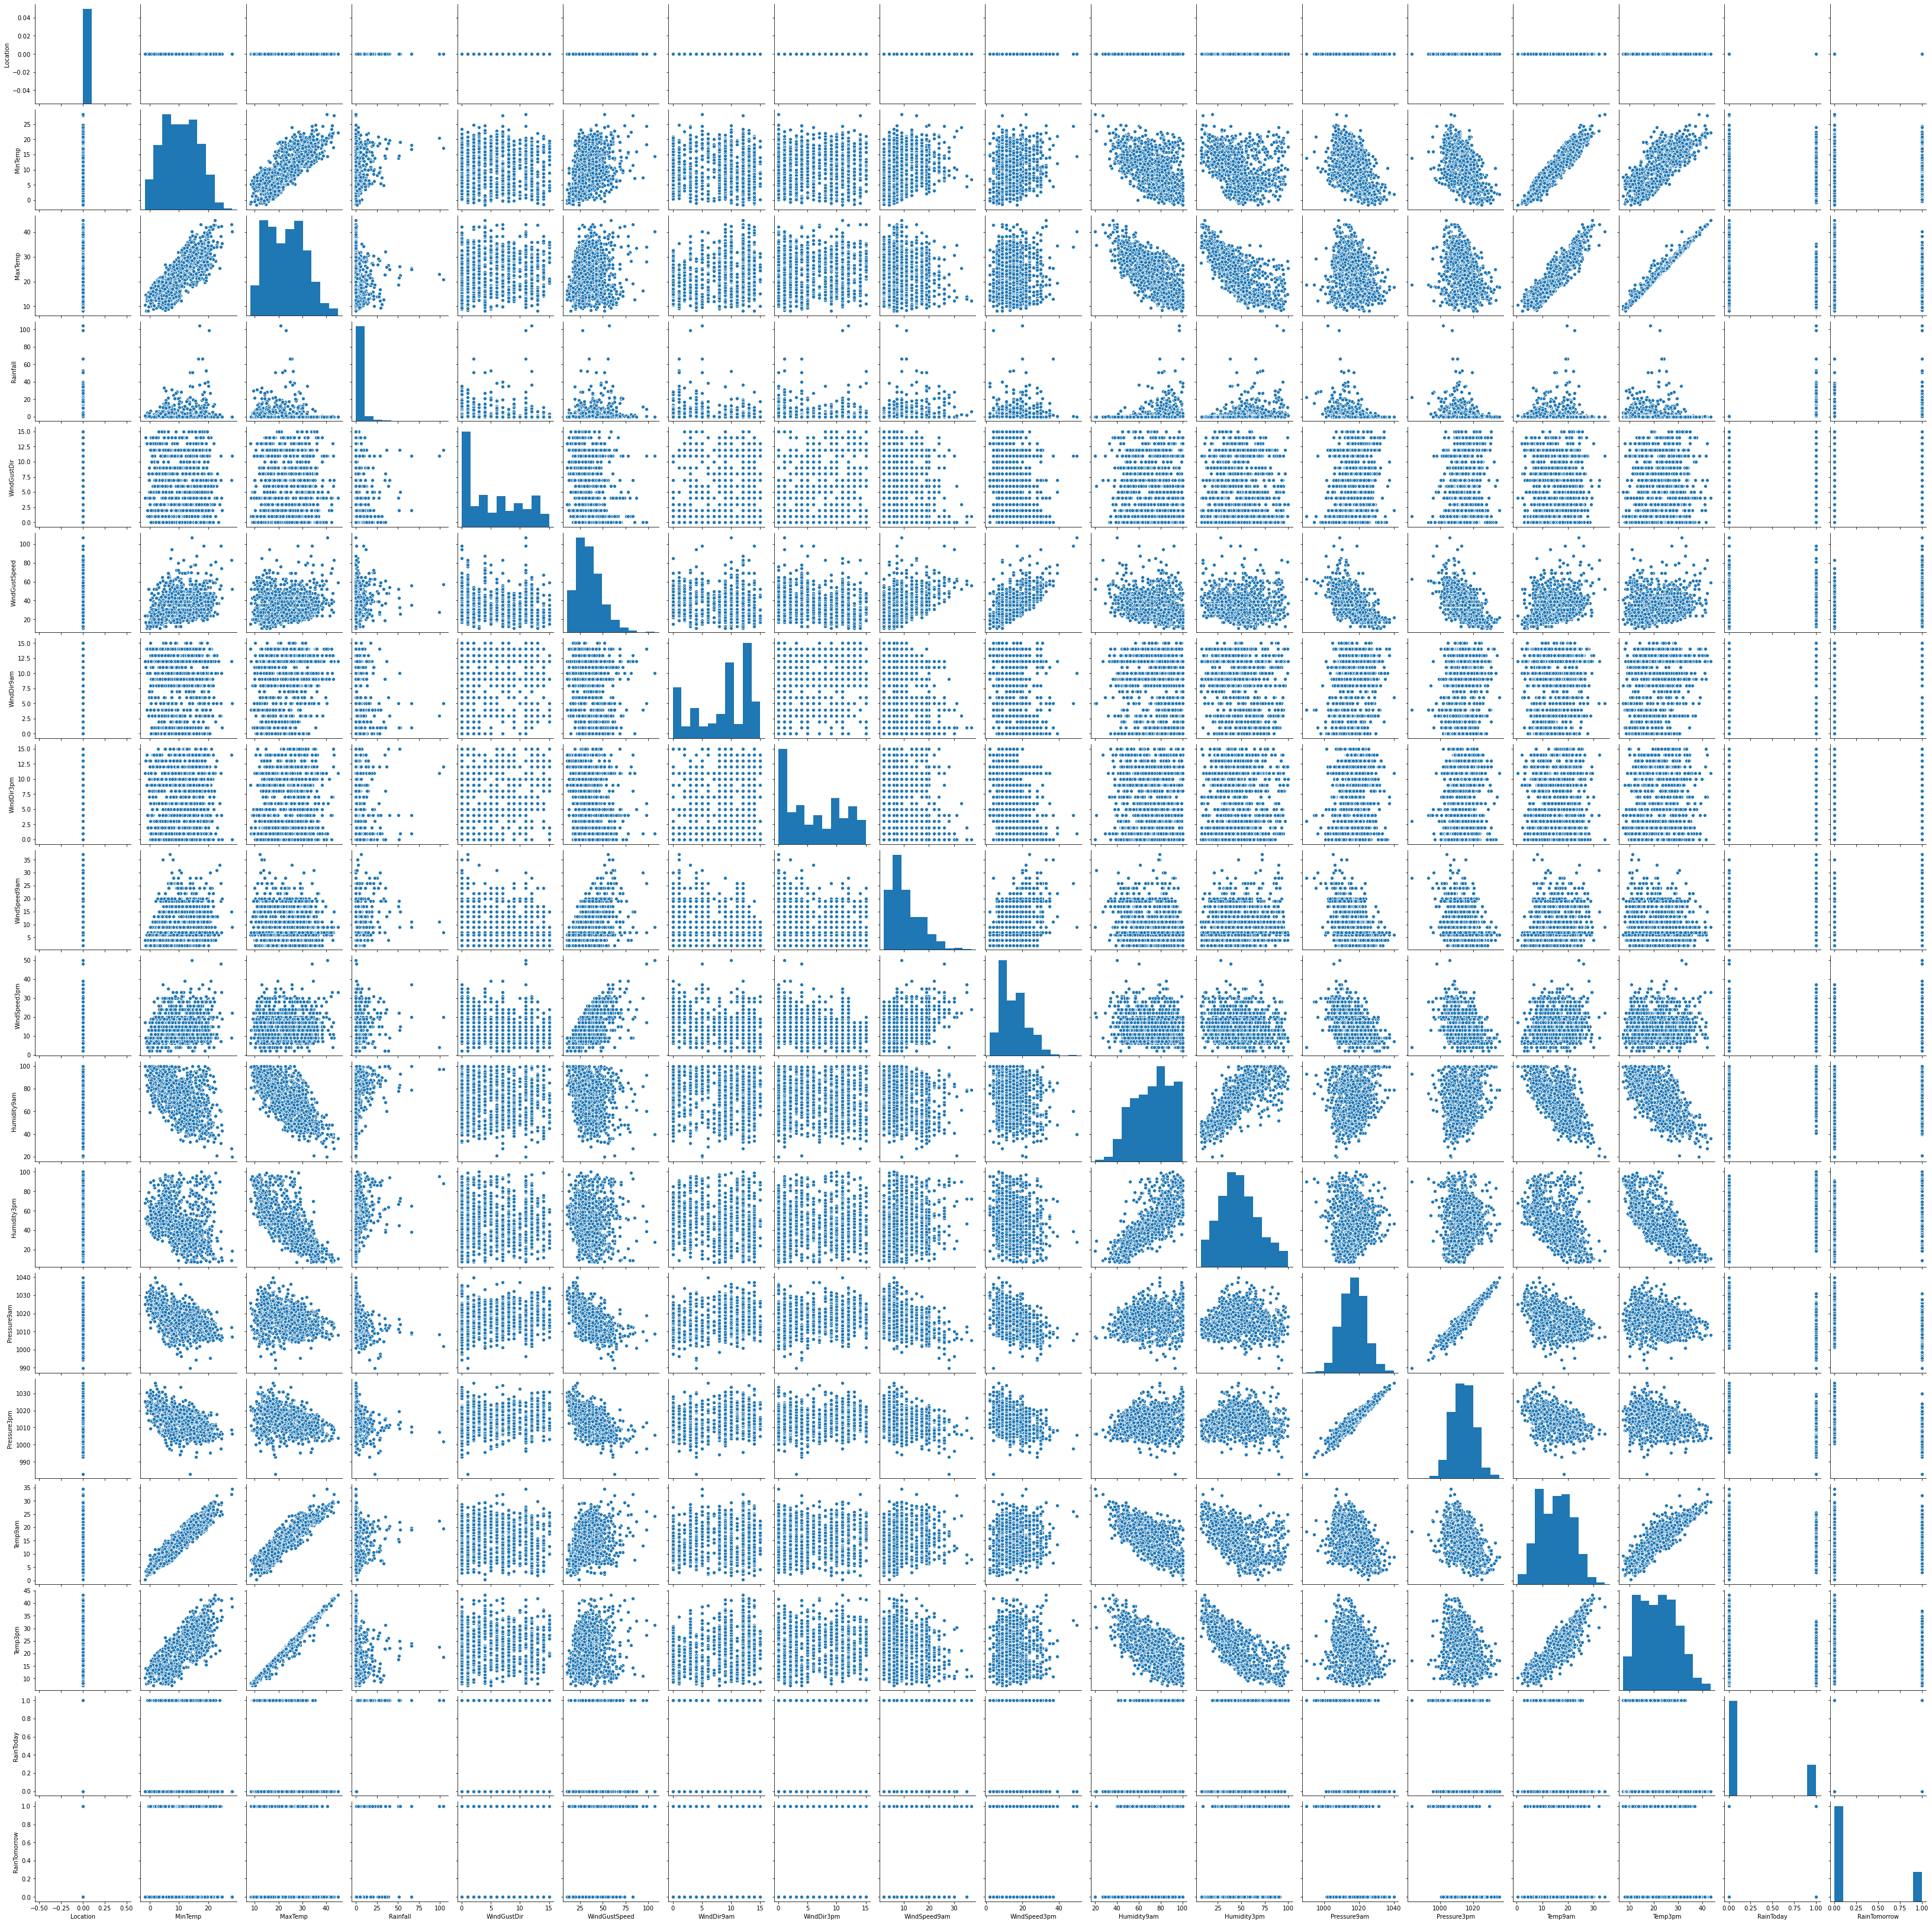

In [25]:
import seaborn as sns 
sns.pairplot(df[:1000])

Text(0.5, 1.0, 'Rain Tomorrow')

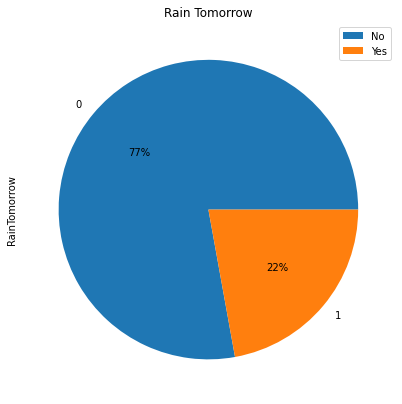

In [26]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.3,1.3])
df["RainTomorrow"].value_counts().plot(kind='pie',autopct="%2i%%")
plt.legend(['No','Yes'])
plt.title('Rain Tomorrow')

#### Now that the data is sorted out, it is time to start with the KNN model.

In [27]:
y = df["RainTomorrow"]
X = df.drop(["RainTomorrow"], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.50)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.15061309, -0.58715495,  0.55149015, ...,  0.00580449,
         0.68602783, -0.5390909 ],
       [-0.17754988,  0.29293825, -0.50893739, ..., -0.19870425,
        -0.45628048, -0.5390909 ],
       [-1.31279029,  0.4369535 ,  0.06426668, ...,  0.17885035,
         0.2320335 , -0.5390909 ],
       ...,
       [ 1.36313353,  0.29293825,  0.56582025, ..., -0.05712128,
         0.11487367, -0.5390909 ],
       [ 0.71442472, -0.7311702 , -1.22544249, ..., -0.70211038,
        -1.18852941, -0.5390909 ],
       [-1.15061309,  0.75698739,  2.21378197, ...,  0.88676522,
         2.28233048, -0.5390909 ]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# check = []
# preds = []
# for k in range(1, 30):
#     classifier = KNeighborsClassifier(n_neighbors = k)
#     classifier.fit(X_train, y_train)
#     y_pred1 = classifier.predict(X_test)
#     preds.append(y_pred1)
#     check.append(accuracy_score(y_test1,y_pred1))
    
# print(check.index(max(check)))
# y_pred1 = preds[check.index(max(check))]

classifier = KNeighborsClassifier(n_neighbors = 28)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test1, y_pred1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test1,y_pred1)
print("Accuracy:",result2)

Confusion Matrix:
[[42347  1638]
 [ 7130  5348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     43985
           1       0.77      0.43      0.55     12478

    accuracy                           0.84     56463
   macro avg       0.81      0.70      0.73     56463
weighted avg       0.84      0.84      0.83     56463

Accuracy: 0.8447124665710288


#### The best number of K nearest neighbors I have found is 28, and the accuracy is 84.3%.

#### Let's try this time without the Location.

In [31]:
y = df["RainTomorrow"]
X = df.drop(["RainTomorrow","Location"], axis=1)

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size = 0.50)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# check = []
# preds = []
# for k in range(1, 30):
#     classifier = KNeighborsClassifier(n_neighbors = k)
#     classifier.fit(X_train, y_train)
#     y_pred2 = classifier.predict(X_test)
#     preds.append(y_pred2)
#     check.append(accuracy_score(y_test2,y_pred2))

# print(check.index(max(check)))
# y_pred2 = preds[check.index(max(check))]

classifier = KNeighborsClassifier(n_neighbors = 28)
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)

result = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test2, y_pred2)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test2,y_pred2)
print("Accuracy:",result2)

Confusion Matrix:
[[42230  1691]
 [ 7198  5344]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     43921
           1       0.76      0.43      0.55     12542

    accuracy                           0.84     56463
   macro avg       0.81      0.69      0.73     56463
weighted avg       0.83      0.84      0.83     56463

Accuracy: 0.8425694702725679


#### Let's use OHE now for the Winds.

In [32]:
df = pd.read_csv("weatherAUS.csv")
df.drop(dropList, axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)
df.drop("Location", axis=1, inplace=True)

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = pd.get_dummies(data=df, columns=['WindGustDir','WindDir9am','WindDir3pm'])
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          143975 non-null  float64
 1   MaxTemp          144199 non-null  float64
 2   Rainfall         142199 non-null  float64
 3   WindGustSpeed    135197 non-null  float64
 4   WindSpeed9am     143693 non-null  float64
 5   WindSpeed3pm     142398 non-null  float64
 6   Humidity9am      142806 non-null  float64
 7   Humidity3pm      140953 non-null  float64
 8   Pressure9am      130395 non-null  float64
 9   Pressure3pm      130432 non-null  float64
 10  Temp9am          143693 non-null  float64
 11  Temp3pm          141851 non-null  float64
 12  RainToday        142199 non-null  object 
 13  RainTomorrow     142193 non-null  object 
 14  WindGustDir_E    145460 non-null  uint8  
 15  WindGustDir_ENE  145460 non-null  uint8  
 16  WindGustDir_ESE  145460 non-null  uint

#### Trying a different method of converting RainToday and RainTomorrow to numbers. At the end it was the same as earlier.

In [34]:
from sklearn import preprocessing
from numpy import array

enc['RainToday'] = df['RainToday'].astype(str)
enc['RainTomorrow'] = df['RainTomorrow'].astype(str)

lb = preprocessing.LabelBinarizer()

enc['RainToday'] = lb.fit_transform(enc['RainToday'])
enc['RainTomorrow'] = lb.fit_transform(enc['RainTomorrow'])

enc = enc.dropna()

enc[["RainToday","RainTomorrow"]].head(10)

,RainToday,RainTomorrow
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,0
9,0,1


#### This, somehow, turned out to be a dummy classifier.

In [35]:
y = enc['RainTomorrow']
X = enc.drop(['RainTomorrow'], axis=1)

In [36]:
X_train, X_test, y_train, y_test3 = train_test_split(X, y, test_size = 0.50)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# check = []
# preds = []
# for k in range(1, 30):
#     classifier = KNeighborsClassifier(n_neighbors = k)
#     classifier.fit(X_train, y_train)
#     y_pred3 = classifier.predict(X_test)
#     preds.append(y_pred3)
#     check.append(accuracy_score(y_test,y_pred3))

# print(check.index(max(check)))
# y_pred3 = preds[check.index(max(check))]

classifier = KNeighborsClassifier(n_neighbors = 28)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test3, y_pred3)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test3, y_pred3)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test3,y_pred3)
print("Accuracy:",result2)

Confusion Matrix:
[[ 2771 10768]
 [ 1029 45623]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.20      0.32     13539
           1       0.81      0.98      0.89     46652

    accuracy                           0.80     60191
   macro avg       0.77      0.59      0.60     60191
weighted avg       0.79      0.80      0.76     60191

Accuracy: 0.8040072436078484


#### Lets try with Logistic regression.

In [38]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.50)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\guyga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
y_pred4 = model.predict(X_test)
y_pred4

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
model.score(X_test,y_test4)

0.8433486733897094

In [41]:
model.predict_proba(X_test)

array([[0.45389899, 0.54610101],
       [0.78839854, 0.21160146],
       [0.28230692, 0.71769308],
       ...,
       [0.10961547, 0.89038453],
       [0.08574207, 0.91425793],
       [0.96980286, 0.03019714]])

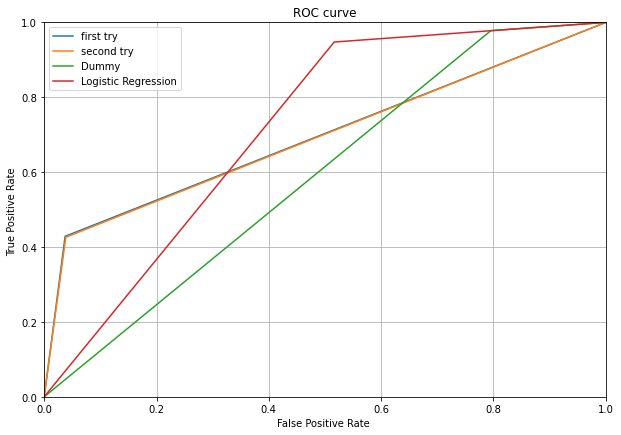

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fig = plt.figure()
axes = fig.add_axes([0,0,1.3,1.3])

fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
plt.plot(fpr, tpr, label='first try')

fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.plot(fpr, tpr, label='second try')

fpr, tpr, thresholds = roc_curve(y_test3, y_pred3)
plt.plot(fpr, tpr, label='Dummy')

fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.grid()
plt.legend()

#### Accuracy of 84.5%.
#### Now, for the improvement attempt, let's try scaling the data and using PCA.

In [62]:
X_train.shape

(60190, 61)

In [44]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

df_scaled = scaler.transform(X_train)
df_scaled

new_clf = SGDClassifier(random_state = 42)
new_clf.fit(df_scaled, y_train)

cross_val_score(new_clf, df_scaled, y_train, cv=3, scoring="accuracy")

array([0.83851675, 0.84603499, 0.84404127])

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=61)

pca_clf = SGDClassifier(random_state = 42)

maxn = 0
maxi = 0

i = 1
while i <= 61:
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    X_pca=pca.transform(df_scaled)
    pca_clf.fit(X_pca, y_train)
    current = cross_val_score(pca_clf, X_pca, y_train, cv=3, scoring="accuracy").max()
    if maxn <= current:
        maxn = current
        maxi = i
    i += 1

print(maxn)
print(maxi)

0.8490330940988836
59


#### Slight improvement, closer to 85%.